# 取り組み

+ [ ] right_loxpがいまいちな理由を考察する
left_loxpに比べてright_loxpのクラスタがはっきりしない

In [8]:
# ルートディレクトリをPathに含めるおまじない
import sys, os
from pathlib import Path
if os.getcwd() != "/mnt/d/Research/DAJIN2":
    parent_path = str(Path(os.path.dirname(os.path.abspath("__file__"))).parent.parent)
    sys.path.append(parent_path)
    os.chdir(parent_path)
print(os.getcwd())

/mnt/d/Research/DAJIN2


# 実験

In [9]:
from __future__ import annotations

import sys, os
from pathlib import Path

sys.path.append("/mnt/d/Research/DAJIN2")
os.chdir("/mnt/d/Research/DAJIN2")

import hashlib
from collections import defaultdict
from pathlib import Path
from importlib import reload

from src.DAJIN2.core import preprocess, classification, clustering, consensus, report
from src.DAJIN2.core.clustering import clustering

# # * flox insertion
SAMPLE, CONTROL, ALLELE, NAME, GENOME, DEBUG, THREADS = (
    "examples/flox-cables2/AyabeTask1/barcode31.fq.gz",
    "examples/flox-cables2/AyabeTask1/barcode42.fq.gz",
    "examples/flox-cables2/AyabeTask1/design_cables2.fa",
    "test-ayabe-task1",
    "mm10",
    True,
    14,
)

print(f"processing {NAME}...")

##########################################################
# Check inputs
##########################################################
preprocess.check_inputs.check_files(SAMPLE, CONTROL, ALLELE)
TEMPDIR = Path("DAJINResults", ".tempdir", NAME)
IS_CACHE_CONTROL = preprocess.check_inputs.exists_cached_control(CONTROL, TEMPDIR)
IS_CACHE_GENOME = preprocess.check_inputs.exists_cached_genome(GENOME, TEMPDIR, IS_CACHE_CONTROL)
UCSC_URL, GOLDENPATH_URL = None, None
if GENOME and not IS_CACHE_GENOME:
    UCSC_URL, GOLDENPATH_URL = preprocess.check_inputs.check_and_fetch_genome(GENOME)

##########################################################
# Format inputs
##########################################################
SAMPLE_NAME = preprocess.format_inputs.extract_basename(SAMPLE)
CONTROL_NAME = preprocess.format_inputs.extract_basename(CONTROL)
FASTA_ALLELES = preprocess.format_inputs.dictionize_allele(ALLELE)

preprocess.format_inputs.make_directories(TEMPDIR, SAMPLE_NAME, CONTROL_NAME)

if GENOME:
    GENOME_COODINATES = preprocess.format_inputs.fetch_coodinate(GENOME, UCSC_URL, FASTA_ALLELES["control"])
    CHROME_SIZE = preprocess.format_inputs.fetch_chrom_size(GENOME_COODINATES["chr"], GENOME, GOLDENPATH_URL)
    preprocess.format_inputs.cache_coodinates_and_chromsize(TEMPDIR, GENOME, GENOME_COODINATES, CHROME_SIZE)

processing test-ayabe-task1...


In [10]:
########################################################################
# Classify alleles
########################################################################

classif_sample = classification.classify_alleles(TEMPDIR, SAMPLE_NAME)

for classif in classif_sample:
    classif["SV"] = classification.detect_sv(classif["CSSPLIT"], threshold=50)

In [7]:
clust_sample = clustering.add_labels(classif_sample, TEMPDIR, CONTROL_NAME, FASTA_ALLELES, THREADS)
clust_sample = clustering.add_readnum(clust_sample)
clust_sample = clustering.add_percent(clust_sample)
clust_sample = clustering.update_labels(clust_sample)


In [15]:
both_loxp = "f855fb9b57ee"
no_loxp = "54661f075dc2"
left_loxp = "7089ae32a686"
right_loxp = "af9e73c7f917"

In [16]:
for samp in clust_sample:
    if both_loxp in samp["QNAME"]:
        print(f"both_loxp: {samp['LABEL']}")
    if left_loxp in samp["QNAME"]:
        print(f"left_loxp: {samp['LABEL']}")
    if right_loxp in samp["QNAME"]:
        print(f"right_loxp: {samp['LABEL']}")
    if no_loxp in samp["QNAME"]:
        print(f"no_loxp: {samp['LABEL']}")

both_loxp: 1
right_loxp: 2
no_loxp: 2
left_loxp: 3


### right_loxpとno_loxpが分かれていない

In [18]:
for i, samp in enumerate(clust_sample):
    if right_loxp in samp["QNAME"]:
        print(f"right_loxp: {i} {samp['CSSPLIT']}")
    if no_loxp in samp["QNAME"]:
        print(f"no_loxp: {i} {samp['CSSPLIT']}")

right_loxp: 568 =G,=G,=C,=A,=A,=G,=A,=A,=C,=G,=A,=C,=C,=T,=G,=C,=T,=T,=T,=T,=T,=A,=C,=C,=T,=T,=A,=C,=A,=G,=A,=A,=C,=C,=A,=A,=G,=C,=A,=T,=G,=C,=A,=T,=C,=T,=G,=G,=A,=T,=C,=A,=C,=C,=A,=A,=G,=A,=C,=A,=C,=A,=A,=A,=G,=G,=C,=C,=T,=G,=A,=A,=G,=A,=A,=A,=A,=C,=C,=C,=A,=C,=T,=T,=C,=A,=T,=C,=A,=A,=G,=A,=A,=C,=A,=T,=G,=A,=G,=G,=C,=A,=G,=T,=A,=T,=G,=A,=C,=A,=C,=A,=A,=A,=G,=A,=A,=C,=A,=G,=C,=A,=G,=G,=T,=G,=A,=G,=T,=G,=A,=G,=T,=G,=T,=A,=G,=G,=G,=C,=C,=A,=G,=G,=C,=C,=C,=G,=G,=G,=A,=A,=G,=G,=C,=C,=A,=C,=T,=G,=T,=G,=C,=T,=C,=C,=C,=T,=G,=T,=A,=C,=T,=G,=T,=A,=G,=G,=A,=T,=C,=A,=G,=G,=C,=C,=G,=T,=G,=T,=C,=T,=C,=T,=G,=G,=G,=G,=G,=C,=C,=A,=A,=A,=A,+T|=A,=T,=A,=T,=G,=A,=G,=A,=C,+T|*CG,*CT,=A,=G,=G,=C,=C,=C,=T,=G,=C,=C,=C,=C,=T,=G,=T,=T,=G,=G,=C,=A,=G,=C,=A,=G,=C,=C,=C,=C,=T,=T,=C,=T,=C,=C,=A,=T,=C,=A,=C,=C,=C,=G,=T,=T,=G,=T,=C,=C,=C,=C,=T,=G,=A,=C,=C,=C,=T,=C,=T,=A,=T,=A,=T,=T,=G,=T,=T,=G,=A,=A,=C,=A,=C,=T,=G,=G,=C,=T,=A,=G,=C,=A,=T,=A,=G,=C,=C,=A,=G,=G,=C,=C,=A,=G,=C,=A,=A,=G,=C,=C,=A,=C,=C,=A,=C,=T,=G,=T,=A,=

In [37]:
x = ["." if cs.startswith("=") else cs for cs in clust_sample[568]["CSSPLIT"].split(",")]
"".join(x)

'.............................................................................................................................................................................................................+T|=A........+T|*CG*CT...............................................................................................................................+A|=A....................................................................................................................................................................................-A-A-G............+T|=T...................+A|+T|+T|+A|=A..........................................*TA...................+T|+G|*AG...+T|=T..................................................................................................................-T..........................................................+G|=C+G|*AT...............................*AT.*GT*GA.................................................................................................

In [39]:
[i for i, xx in enumerate(x) if "+T|+T|+C|+C|+A|+A" in xx]

[1732]

In [24]:
x = ["." if cs.startswith("=") else cs for cs in clust_sample[612]["CSSPLIT"].split(",")]
"".join(x)

'........................+A|=T...........................+C|=C.......................................+A|+G|=A..............................................................-C-A..............................................................................................................................*GA*AG............................................-C......................-A-C.........................+A|=G...-C-A............*AG..............................................................................+A|*GT...................................................................................................................................+A|+A|*GA.......................................................................................................................-C-T-G-T-A-G-G-T-C-A..-G-T..............................................................................*GA.......................................................................................................................

In [25]:
from __future__ import annotations
from itertools import groupby
from copy import deepcopy
from collections import defaultdict
from pathlib import Path
import midsv

from src.DAJIN2.core.preprocess.correct_knockin import extract_knockin_loci
from src.DAJIN2.core.clustering.preprocess import replace_both_ends_n
from src.DAJIN2.core.clustering.make_score import make_score
from src.DAJIN2.core.clustering.annotate_score import annotate_score
from src.DAJIN2.core.clustering.reorder_labels import reorder_labels
from src.DAJIN2.core.clustering.return_labels import return_labels


paths_midsv = list(Path(TEMPDIR, "midsv").glob(f"{CONTROL_NAME}_splice_*"))
cssplits_control_by_alleles = defaultdict(list)
for path_midsv in paths_midsv:
    midsv_control = midsv.read_jsonl(path_midsv)
    allele = path_midsv.stem.split("_")[-1]
    cssplits = [cs["CSSPLIT"].split(",") for cs in midsv_control]
    cssplits_control_by_alleles[allele] = cssplits
knockin_alleles = extract_knockin_loci(TEMPDIR)
labels_all = []
max_label = 0
classif_sample.sort(key=lambda x: (x["ALLELE"], x["SV"]))

In [26]:
allele = "control"
sv = False

In [27]:
cssplits_control = cssplits_control_by_alleles[allele]
cssplits_sample = [cs["CSSPLIT"].split(",") for cs in classif_sample if cs["ALLELE"] == allele and cs["SV"] == sv]
cssplits_control = replace_both_ends_n(cssplits_control)
cssplits_sample = replace_both_ends_n(cssplits_sample)
mutation_score = make_score(cssplits_control, cssplits_sample, knockin_alleles[allele])
scores_control = annotate_score(cssplits_control, mutation_score)
scores_sample = annotate_score(cssplits_sample, mutation_score)
labels = return_labels(scores_sample, scores_control)

In [29]:
from collections import defaultdict
from collections import Counter

Counter(labels)

Counter({1: 372})

In [32]:
x = [cs for cs in classif_sample if cs["ALLELE"] == allele and cs["SV"] == sv]
for i, samp in enumerate(x):
    if right_loxp in samp["QNAME"]:
        print(f"right_loxp: {i}")
    if no_loxp in samp["QNAME"]:
        print(f"no_loxp: {i}")

right_loxp: 74
no_loxp: 118


In [44]:
print(cssplits_sample[74][1732])
print(scores_sample[74][1732])

+T|+T|+C|+C|+A|+A|+C|+A|+T|+A|+A|+C|+T|+G|+C|+A|+T|+A|+T|+A|+C|+A|+T|+T|+A|+T|+A|+A|+T|+G|+A|+A|+G|+T|+T|+A|+T|+G|+G|+C|+G|+C|+G|+C|=C
0


In [43]:
print(mutation_score[1732])


{'=T,+T|+A|+T|+G|+G|+C|+G|+C|+G|+C|=C,=C': 2.1505376344086025, '=T,+C|+A|+A|+A|+C|+A|+T|+A|+A|+C|+T|+T|+C|+G|+T|+A|+T|+G|+C|+G|+A|+T|+A|+C|+A|+T|+T|+A|+T|+A|+C|+G|+A|+A|+G|+T|+T|+A|+T|+G|+G|+C|+G|+C|+G|+C|=C,=C': 0.5376344086021506}


In [46]:
from __future__ import annotations
from itertools import groupby
from copy import deepcopy
from collections import defaultdict
from pathlib import Path
import midsv

from src.DAJIN2.core.preprocess.correct_knockin import extract_knockin_loci
from src.DAJIN2.core.clustering.preprocess import replace_both_ends_n, compress_insertion
from src.DAJIN2.core.clustering.make_score import make_score
from src.DAJIN2.core.clustering.annotate_score import annotate_score
from src.DAJIN2.core.clustering.reorder_labels import reorder_labels
from src.DAJIN2.core.clustering.return_labels import return_labels

cssplits_control = cssplits_control_by_alleles[allele]
cssplits_sample = [cs["CSSPLIT"].split(",") for cs in classif_sample if cs["ALLELE"] == allele and cs["SV"] == sv]
cssplits_control = replace_both_ends_n(cssplits_control)
cssplits_sample = replace_both_ends_n(cssplits_sample)
cssplits_control = compress_insertion(cssplits_control)
cssplits_sample = compress_insertion(cssplits_sample)
mutation_score = make_score(cssplits_control, cssplits_sample, knockin_alleles[allele])
scores_control = annotate_score(cssplits_control, mutation_score)
scores_sample = annotate_score(cssplits_sample, mutation_score)
labels = return_labels(scores_sample, scores_control)

In [47]:
print(mutation_score[1732])


{'=T,+I=C,=C': 6.349417932995646}


In [51]:
print("right_loxp:---------------------")
print(cssplits_sample[74][1732])
print(scores_sample[74][1732])

print("control:---------------------")
print(cssplits_sample[118][1732])
print(scores_sample[118][1732])

right_loxp:---------------------
+I=C
6.349417932995646
control:---------------------
=C
0


In [49]:
Counter(labels)

Counter({1: 372})

### `compress_insertion`を入れることでscores_sampleには挿入が反映されたが、依然としてクラスタには分かれていない

In [53]:
from __future__ import annotations
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.exceptions import ConvergenceWarning
from collections import Counter

from src.DAJIN2.core.clustering.merge_clusters import merge_clusters
from src.DAJIN2.core.clustering.reorder_labels import reorder_labels

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

###############################################################################
# Dimension reduction
###############################################################################


def reduce_dimension(scores_sample: list[list], scores_control_subset: list[list]) -> np.array:
    scores = scores_sample + scores_control_subset
    n_components = min(20, len(scores[0]))
    pca = PCA(n_components=n_components).fit(scores)
    return pca.transform(scores)


def optimize_labels(X: np.array, scores_sample: list[list], scores_control_subset: list[list]) -> list[int]:
    scores = scores_sample + scores_control_subset
    n_components = min(20, len(scores))
    labels_results = [1] * len(scores_sample)
    for i in range(1, n_components):
        np.random.seed(seed=1)
        labels = GaussianMixture(n_components=i, random_state=1).fit_predict(X)
        labels = labels.tolist()
        labels_sample = labels[: len(scores_sample)]
        labels_control = labels[len(scores_sample) :]
        labels_merged = merge_clusters(labels_control, labels_sample)
        labels_reorder = reorder_labels(labels_merged)
        # Reads < 1% in the control are considered clustering errors and are not counted
        count_control = Counter(labels_control)
        num_labels_control = sum(1 for reads in count_control.values() if reads/sum(count_control.values())*100 > 1)
        if num_labels_control > 1:
            return labels_results
        labels_results = labels_reorder
    return labels_results


###############################################################################
# main
###############################################################################


def return_labels(scores_sample: list[list], scores_control: list[list]) -> list[int]:
    np.random.seed(seed=1)
    X_control = reduce_dimension([], scores_control)
    labels = GaussianMixture(n_components=2, random_state=1).fit_predict(X_control)
    label_most = Counter(labels).most_common()[0][0]
    scores_control_subset = [s for l, s in zip(labels, scores_control) if l == label_most][:1000]
    X = reduce_dimension(scores_sample, scores_control_subset)
    labels = optimize_labels(X, scores_sample, scores_control_subset)
    return labels


In [54]:
np.random.seed(seed=1)
X_control = reduce_dimension([], scores_control)
labels = GaussianMixture(n_components=2, random_state=1).fit_predict(X_control)
label_most = Counter(labels).most_common()[0][0]
scores_control_subset = [s for l, s in zip(labels, scores_control) if l == label_most][:1000]
X = reduce_dimension(scores_sample, scores_control_subset)
labels = optimize_labels(X, scores_sample, scores_control_subset)


In [55]:
Counter(labels)

Counter({1: 372})

In [56]:
scores = scores_sample + scores_control_subset
n_components = min(20, len(scores))
labels_results = [1] * len(scores_sample)
for i in range(1, n_components):
    np.random.seed(seed=1)
    labels = GaussianMixture(n_components=i, random_state=1).fit_predict(X)
    labels = labels.tolist()
    labels_sample = labels[: len(scores_sample)]
    labels_control = labels[len(scores_sample) :]
    labels_merged = merge_clusters(labels_control, labels_sample)
    labels_reorder = reorder_labels(labels_merged)
    print(Counter(labels_sample), Counter(labels_control)) # ! ========================
    # # Reads < 1% in the control are considered clustering errors and are not counted
    # count_control = Counter(labels_control)
    # num_labels_control = sum(1 for reads in count_control.values() if reads/sum(count_control.values())*100 > 1)
    # if num_labels_control > 1:
    #     return labels_results
    # labels_results = labels_reorder


Counter({0: 372}) Counter({0: 934})
Counter({0: 193, 1: 179}) Counter({0: 777, 1: 157})
Counter({0: 176, 1: 166, 2: 30}) Counter({0: 734, 1: 152, 2: 48})
Counter({0: 165, 1: 144, 3: 38, 2: 25}) Counter({0: 700, 1: 139, 3: 54, 2: 41})
Counter({0: 153, 1: 131, 4: 33, 3: 32, 2: 23}) Counter({0: 682, 1: 157, 3: 54, 2: 41})
Counter({0: 151, 1: 110, 4: 32, 5: 29, 3: 28, 2: 22}) Counter({0: 682, 1: 148, 3: 52, 2: 39, 5: 13})
Counter({0: 133, 1: 116, 4: 30, 5: 29, 3: 27, 2: 21, 6: 16}) Counter({0: 644, 1: 182, 3: 52, 2: 39, 5: 13, 6: 4})
Counter({0: 137, 1: 126, 3: 32, 4: 25, 7: 22, 5: 14, 6: 12, 2: 4}) Counter({0: 659, 1: 148, 3: 52, 7: 39, 5: 16, 4: 11, 6: 7, 2: 2})
Counter({0: 132, 1: 121, 3: 32, 4: 25, 7: 22, 5: 14, 6: 12, 8: 10, 2: 4}) Counter({0: 649, 1: 148, 3: 52, 7: 39, 5: 16, 4: 11, 8: 10, 6: 7, 2: 2})
Counter({0: 117, 1: 116, 9: 32, 3: 27, 4: 25, 7: 21, 5: 12, 8: 10, 6: 8, 2: 4}) Counter({0: 623, 1: 174, 3: 52, 7: 39, 5: 16, 4: 11, 8: 10, 6: 7, 2: 2})
Counter({0: 127, 1: 96, 9: 30, 

In [58]:
i = 2
np.random.seed(seed=1)
labels = GaussianMixture(n_components=i, random_state=1).fit_predict(X)
labels = labels.tolist()
labels_sample = labels[: len(scores_sample)]
labels_control = labels[len(scores_sample) :]
labels_merged = merge_clusters(labels_control, labels_sample)
labels_reorder = reorder_labels(labels_merged)
print(Counter(labels_sample), Counter(labels_control)) # ! ========================


Counter({0: 193, 1: 179}) Counter({0: 777, 1: 157})


In [61]:
# right_loxp: 74
# no_loxp: 118
print(labels_sample[74])
print(labels_sample[118])

1
1


In [63]:
print(sum(scores_sample[74]))
print(sum(scores_sample[118]))

11.792410912645519
18.268461743535056


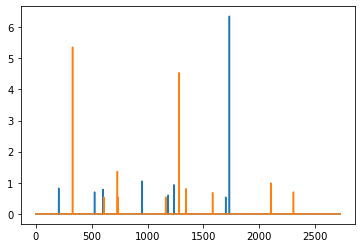

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores_sample[74])
plt.plot(scores_sample[118])

In [65]:
for i,s in enumerate(scores_sample[118]):
    if s > 4:
        print(i)

329
1280


In [67]:
print(mutation_score[329])
print(mutation_score[1280])

{'=T,-C,=C': 5.358571047720607, '-T,-C,=C': 0.9719630320803343}
{'=C,+I=G,=A': 4.533235581622678, '=C,-G,-A': 1.0963743001866169}


In [74]:
count = defaultdict(int)
for cs in cssplits_control:
    count[cs[329]] += 1
print("=====================")
print("control @ 329")
print(count)

count = defaultdict(int)
for cs in cssplits_sample:
    count[cs[329]] += 1
print("=====================")
print("sample @ 329")
print(count)

control @ 329
defaultdict(<class 'int'>, {'=C': 824, '-C': 125, 'N': 8, '+I*CA': 3, '+I=C': 7, '+I*CT': 1})
sample @ 329
defaultdict(<class 'int'>, {'=C': 319, '-C': 50, '+I=C': 3})


In [76]:
from __future__ import annotations
from collections import defaultdict
from collections import Counter

knockin_alleles = extract_knockin_loci(TEMPDIR)
knockin_loci = knockin_alleles[allele]

def call_count(cssplits: list[list[str]]) -> list[dict[str, int]]:
    """Count cssplits within 3-mer range.
    Args:
        cssplits (list[list[str]])
    Returns:
        list[dict[str, int]]: Both ends are counted as "N" to keep sequence length.
    """
    count_kmer = defaultdict(Counter)
    for cssplit in cssplits:
        for i in range(1, len(cssplit) - 1):
            kmer = ",".join([cssplit[i - 1], cssplit[i], cssplit[i + 1]])
            count_kmer[i] += Counter([kmer])
    coverage = len(cssplits)
    count_score = [{"N": coverage}]
    count_score += [dict(count_kmer[i]) for i in range(1, len(cssplit) - 1)]
    count_score += [{"N": coverage}]
    return count_score


def call_percent(counts: list[dict[str:int]]) -> list[dict[str:float]]:
    cssplit_percent = []
    coverage = sum(counts[0].values())
    for count in counts:
        percent = {k: v / coverage * 100 for k, v in count.items()}
        cssplit_percent.append(percent)
    return cssplit_percent


def subtract_percentage(percent_control, percent_sample, knockin_loci) -> list[dict]:
    sample_subtracted = []
    for i, (cont, samp) in enumerate(zip(percent_control, percent_sample)):
        if i in knockin_loci:
            sample_subtracted.append(samp)
            continue
        samp = Counter(samp)
        samp.subtract(Counter(cont))
        sample_subtracted.append(dict(samp))
    return sample_subtracted


def discard_common_error(sample_subtracted, threshold=0.5):
    sample_discarded = []
    for samp in sample_subtracted:
        remained = {k: v for k, v in samp.items() if v > threshold}
        sample_discarded.append(remained)
    return sample_discarded


def discard_match(sample_subtracted):
    sample_discarded = []
    for samp in sample_subtracted:
        remained = {k: v for k, v in samp.items() if not k.split(",")[1].startswith("=")}
        sample_discarded.append(remained)
    return sample_discarded


counts_control = call_count(cssplits_control)
counts_sample = call_count(cssplits_sample)
percent_control = call_percent(counts_control)
percent_sample = call_percent(counts_sample)
percent_subtraction = subtract_percentage(percent_control, percent_sample, knockin_loci)
percent_discarded = discard_common_error(percent_subtraction, 0.5)
mutation_score = discard_match(percent_discarded)


In [77]:
count = defaultdict(int)
for cs in percent_control:
    count[cs[329]] += 1
print("=====================")
print("control @ 329")
print(count)

count = defaultdict(int)
for cs in percent_sample:
    count[cs[329]] += 1
print("=====================")
print("sample @ 329")
print(count)

KeyError: 329

In [85]:
sorted(percent_control[329].items(), key=lambda x: -x[1])

[('=T,=C,=C', 83.16115702479338),
 ('=T,-C,-C', 9.297520661157025),
 ('=T,-C,=C', 3.512396694214876),
 ('-T,=C,=C', 0.9297520661157025),
 ('N,N,N', 0.8264462809917356),
 ('=T,+I=C,=C', 0.7231404958677686),
 ('+I=T,=C,=C', 0.5165289256198348),
 ('=T,+I*CA,=C', 0.30991735537190085),
 ('=T,=C,-C', 0.2066115702479339),
 ('=T,=C,+I*CT', 0.10330578512396695),
 ('=T,=C,+I=C', 0.10330578512396695),
 ('-T,-C,=C', 0.10330578512396695),
 ('=T,=C,+I*CG', 0.10330578512396695),
 ('=T,+I*CT,=C', 0.10330578512396695)]

In [84]:
sorted(percent_sample[329].items(), key=lambda x: -x[1])

[('=T,=C,=C', 82.52688172043011),
 ('=T,-C,=C', 8.870967741935484),
 ('=T,-C,-C', 3.225806451612903),
 ('-T,=C,=C', 2.1505376344086025),
 ('-T,-C,=C', 1.0752688172043012),
 ('=T,+I=C,=C', 0.8064516129032258),
 ('+I=T,=C,+I=C', 0.2688172043010753),
 ('+I=T,=C,=C', 0.2688172043010753),
 ('-T,=C,+I*CT', 0.2688172043010753),
 ('=T,=C,+I*CT', 0.2688172043010753),
 ('-T,-C,-C', 0.2688172043010753)]

In [83]:
sorted(percent_subtraction[329].items(), key=lambda x: -x[1])

[('=T,-C,=C', 5.358571047720607),
 ('-T,=C,=C', 1.2207855682929),
 ('-T,-C,=C', 0.9719630320803343),
 ('+I=T,=C,+I=C', 0.2688172043010753),
 ('-T,=C,+I*CT', 0.2688172043010753),
 ('-T,-C,-C', 0.2688172043010753),
 ('=T,=C,+I*CT', 0.16551141917710838),
 ('=T,+I=C,=C', 0.08331111703545713),
 ('=T,=C,+I=C', -0.10330578512396695),
 ('=T,=C,+I*CG', -0.10330578512396695),
 ('=T,+I*CT,=C', -0.10330578512396695),
 ('=T,=C,-C', -0.2066115702479339),
 ('+I=T,=C,=C', -0.24771172131875946),
 ('=T,+I*CA,=C', -0.30991735537190085),
 ('=T,=C,=C', -0.6342753043632712),
 ('N,N,N', -0.8264462809917356),
 ('=T,-C,-C', -6.071714209544122)]

In [89]:
FASTA_ALLELES[allele][300:330]

'GCCAGGCCAGCAAGCCACCACTGTATAATC'

In [91]:
FASTA_ALLELES[allele][329:335]

'CCCAGG'

### 1280の場所は？

In [92]:
FASTA_ALLELES[allele][1280:1280+30]

'GAACACGGGTAAGCCCTGGTCCTGCTGAGC'

In [93]:
print(sorted(percent_control[1280].items(), key=lambda x: -x[1]))
print(sorted(percent_sample[1280].items(), key=lambda x: -x[1]))

[('=C,=G,=A', 82.64462809917356), ('=C,+I=G,=A', 5.681818181818182), ('N,N,N', 3.512396694214876), ('-C,=G,=A', 1.6528925619834711), ('=C,-G,=A', 1.3429752066115703), ('=C,=G,-A', 1.0330578512396695), ('=C,=G,+I=A', 1.0330578512396695), ('+I=C,=G,=A', 0.8264462809917356), ('-C,-G,-A', 0.6198347107438017), ('=C,-G,-A', 0.5165289256198348), ('=C,+I=G,+I*AT', 0.4132231404958678), ('-C,=G,-A', 0.30991735537190085), ('-C,-G,=A', 0.10330578512396695), ('+I*CT,=G,-A', 0.10330578512396695), ('+I*CA,=G,=A', 0.10330578512396695), ('=C,=G,+I*AG', 0.10330578512396695)]
[('=C,=G,=A', 84.40860215053763), ('=C,+I=G,=A', 10.21505376344086), ('=C,-G,=A', 1.6129032258064515), ('=C,-G,-A', 1.6129032258064515), ('-C,=G,=A', 0.5376344086021506), ('-C,=G,-A', 0.5376344086021506), ('+I=C,=G,=A', 0.2688172043010753), ('=C,=G,-A', 0.2688172043010753), ('+I*CG,=G,=A', 0.2688172043010753), ('-C,-G,-A', 0.2688172043010753)]


In [94]:
print(sorted(percent_subtraction[1280].items(), key=lambda x: -x[1]))

[('=C,+I=G,=A', 4.533235581622678), ('=C,=G,=A', 1.7639740513640731), ('=C,-G,-A', 1.0963743001866169), ('=C,-G,=A', 0.2699280191948812), ('+I*CG,=G,=A', 0.2688172043010753), ('-C,=G,-A', 0.22771705323024977), ('-C,-G,=A', -0.10330578512396695), ('+I*CT,=G,-A', -0.10330578512396695), ('+I*CA,=G,=A', -0.10330578512396695), ('=C,=G,+I*AG', -0.10330578512396695), ('-C,-G,-A', -0.3510175064427264), ('=C,+I=G,+I*AT', -0.4132231404958678), ('+I=C,=G,=A', -0.5576290766906602), ('=C,=G,-A', -0.7642406469385943), ('=C,=G,+I=A', -1.0330578512396695), ('-C,=G,=A', -1.1152581533813204), ('N,N,N', -3.512396694214876)]


# 結果


### 補正がうまく行っていないことがわかった

- `chr2:180,264,007（329）`の欠失はbartcode31にも42にも同程度で見られる
    - にもかかわらず補正がされていない
    - ClusteringではなくPreprocessingにおける補正の問題である
- `chr2:180,263,057（1279）`の挿入も同様にbartcode31にも42にも同程度で見られる

補正がうまく行っていないために、right_loxpのクラスタリングがうまく行っていないと考えられる
-> `preprocessing`にてデバッグする


# 次回の課題

+ [x] ~~点変異、欠失、ノックインのデザインで動くかを確認する~~
+ [x] ~~Clusteringのときの警告メッセージは無害なので消去する~~
+ [ ] right_loxpがいまいちな理由を考察する
    +  [ ] Ayabe-task1のpreprocessにおいて、329と1280の補正がされていない理由を検討する # TODO !
+ [ ] `preprocess.correct_sequence_error.replace_atmark`のコードがわかりにくい
    + テストを用意してリファクタリングする
+ [ ] Insertionのなかにある変異を同定する手法を考案する
+ [ ] cis変異の両端が欠失している場合に、Nで置き換えるとtransとなってしまうのをどうするか（`replace_n`）
+ [ ] 短いリードの扱いをどうするべきか

次回は
+ [ ] right_loxpがいまいちな理由を考察する
